In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from nltk import SnowballStemmer


In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv('./data/processed/translated_poems.csv')

In [5]:
pd.set_option('display.max_colwidth', None)

df.iloc[0]

Title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [16]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')


In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

unnecessary_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
    "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once",
    "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such",
    "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "d", "ll", "m", "o", "re", "ve", "y",
    "look", "go", "get", "make", "say", "see", "come", "think", "take", "know", "use", "find", "want", "give", "tell", "work", "call", "ask", "need", "feel", "become", "leave", "put", "mean", "keep", "let"
]


def preprocess_text(text, domain_specific_stopwords=None, custom_contractions=None):
    nltk.download('stopwords')
    nltk.download('punkt')

    
    if not isinstance(text, str):
        return ""  

    
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    
    contractions_dict = {
        "can't": "cannot",
        "won't": "will not",
        
    }
    words = text.split()
    expanded_words = [contractions_dict.get(word, word) for word in words]
    text = ' '.join(expanded_words)

    
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    if domain_specific_stopwords:
        stop_words.update(domain_specific_stopwords)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in unnecessary_words]

    
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    
    cleaned_text = ' '.join(lemmatized_tokens)
    return cleaned_text


In [35]:
df['cleaned_text'] = df['Content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\

In [36]:
df[['Title','cleaned_text']].to_csv('preprocessed_text.csv',index=False)

In [37]:
df1 = pd.read_csv('preprocessed_text.csv')

In [38]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords



m,n = df1.shape
df1.dropna()


,Title,cleaned_text
0,भिखारी,beggar stand still pitiful eye look silent light deep sorrow thin thread hope play near sunlit courtyard single point dissolve entire history life tattered clothes oh time cruel thought like stone path life shivering trembling stand beggar extends begging bowl ala tax he unstable filled fear dust year fallen upon head stream tear etched upon face day day upon chest wound carved deep slowly slowly drag silent cry fill air around heart breaking agony leaning wornout stick utters voice tear chest handful rice lifetime plea handful rice among human cry depth human heart brother plea alms handful rice seek sunlit courtyard dark observation amidst laughter flower sorrowful lamentation could whose son whose father poor mother holding dear lit two lamp eye hope opened eye near gaze sun moon close lose mind sweet life lamp dim eye lord buddha beggar came form word pain heart cried vast ocean great compassion word surged disguise aside pride sacrifice turned cruel heartless fallen dark cloud lost darkness god beggar god speaks entered heart searching every house courtyard speaks voice pain heart heavy compassion ocean tear age past pours depth sorrow god speaks opening abyss begs compassion brother oh people earth god begs alms beggar courtyard
1,बादल,offspring vast water born summer heat festive birth bright clean sun wave laughed dancing glee wind invited afar blowing great vigor yearned soar sky aspiration high slowly climbed clean ray like tiny thread light higher higher climbed met spread realm sky wind carry u wander world island city jungle divine exhibition earth plain field valley cave mountain forest river garden stream crystalclear water cascading waterfall grove tree humble hut grand mansion palace avenue
2,तिनको घँसिया गीत,velvetsoft grassy green roof mountain lush beautiful lap chirping chirping countless bird sing sky canvas pristine deep blue fluffy cottonlike cloud westward crimson glow eastward net painter masterpiece lone maiden eye bright body radiant cheek rosy light delicate heartstealing melody charming graceful lovely open bright expanse solitude youthful laughter bloom freely full moon artistic glory sparkling dewdrop playfully dance charming smile grace lip beautiful water cool ground sings melodious song water murmur sun descent cloud shimmer leaf sway gently tender hand gather fresh red berry young maiden like flowing river cut emotion resonating fragrant crop fill essence within somewhere far distant flute play youthful tune gentle tremor arises enchanting flower bud open lip blending water merging heart soon unite within cloud heart beat sync world melody beautiful water cool ground sings melodious song memory resurface melody intertwine time flow reverse birdsong echo ear nature adorns hue maiden sits cutting grass red rhododendron bloom hair youth sweet reflection water seems boundless like distant shore fade away like speck dust beautiful gate infinity heart tremble touched nature lotus bud beauty song longing take flight reach bright city light time speaks enchanting word grass cut swish beautiful water cool ground melodious song arises
3,सन्ध्या,lalitpurs highart craftsmanship wonder chisel wrought balanced delicate line pattern etched upon vaporsmooth marble red vasant mahal window ancient west atop chandragiri vast drink water gleam gold wellprepared stand traveler sunset wing imagination sweet murmur turmoil emotion road time long age alley alley soul spectator seek beauty alley alley behind window pattern whose exquisite face whose sweet fragment vision savoring savoring flickering light heart amazed imagination truly luxurious older memory queen beauty royal maid bygone era burning bright solitary immortal thirsty love etched bar heaven court vasants inner chamber today shringar eager apply kohl adorn long flowing garment dream heart lovestruck krishnalike hair like flowing cloud captivate fill jewel steal heart conquer simrik bird springsunlike bright tika firmly plac

In [39]:
m

36

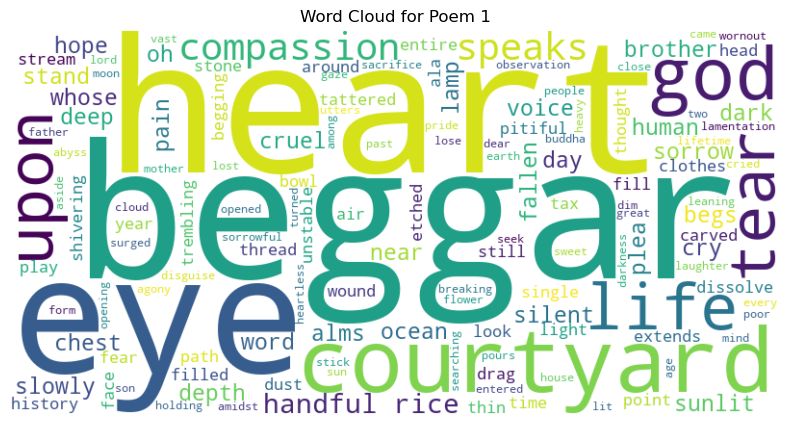

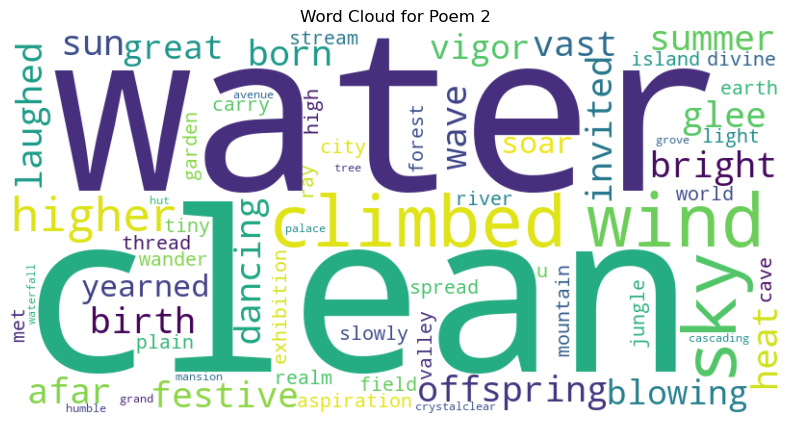

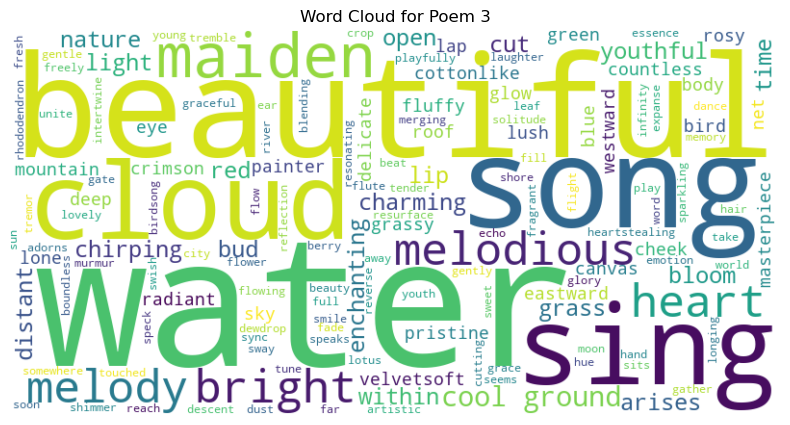

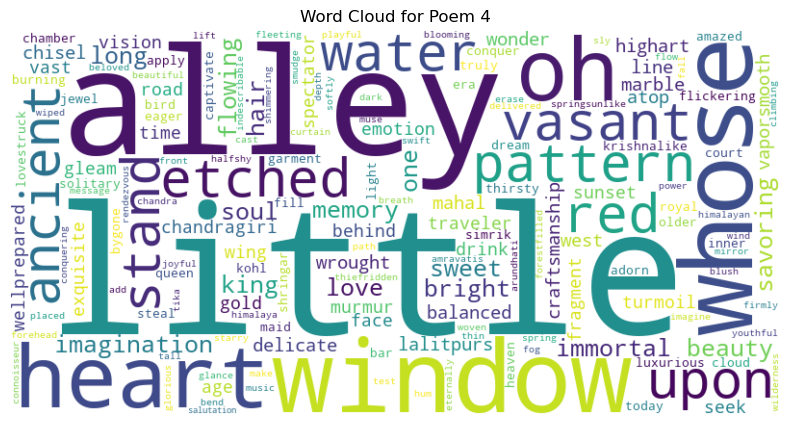

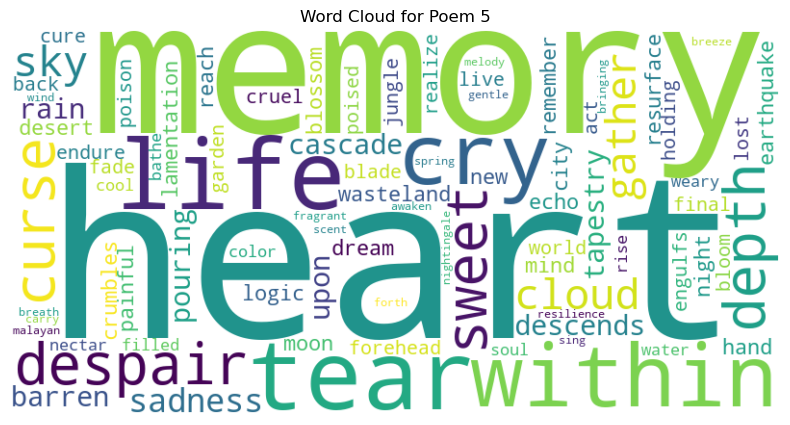

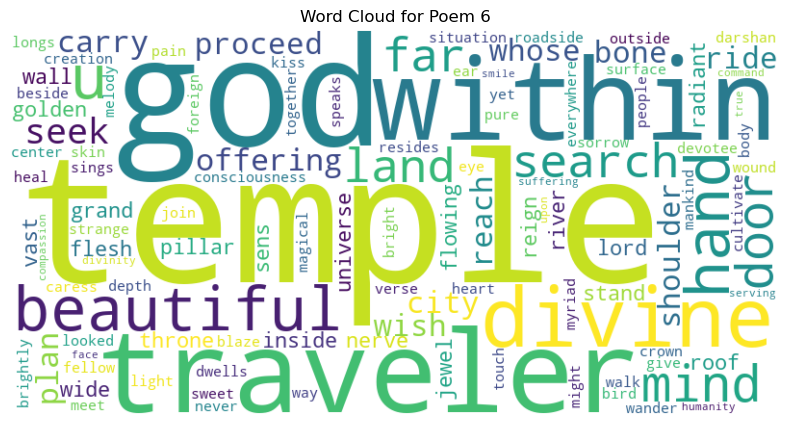

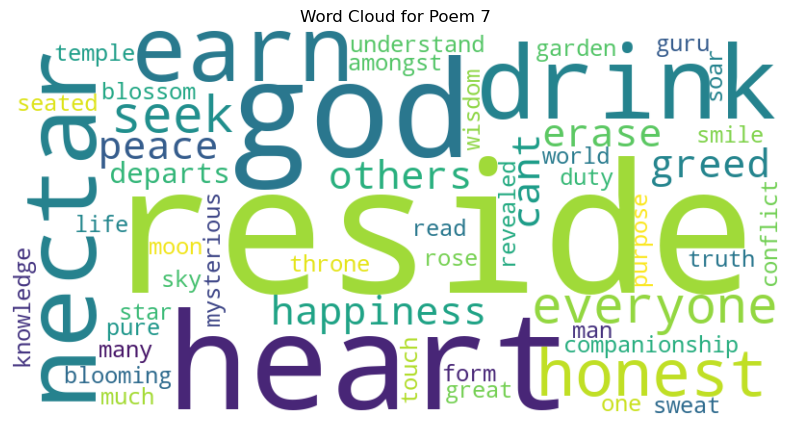

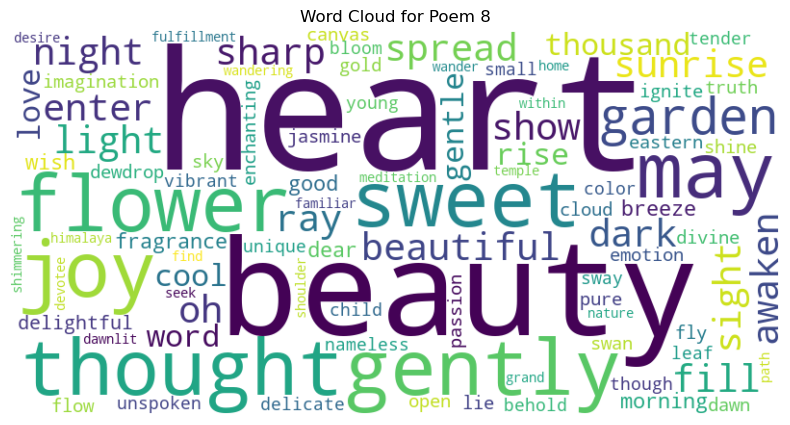

TypeError: expected string or bytes-like object

In [40]:
for idx, row in df1.iterrows():
    
    wc = WordCloud(width=800, height=400, background_color='white').generate(row['cleaned_text'])

    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Poem {idx + 1}')
    plt.show()
